In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
df= pd.read_csv('movie_data.csv', encoding ='utf-8')

In [3]:
df.head()

,budget,genres,homepage,id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,keywords
0,4000000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 35, ""name...",NaN,5,en,Four Rooms,It's Ted the Bellhop's first night on the job....,12.448,"[{""id"": 14, ""logo_path"": ""/m6AHu84oZQxvq7n1rsv...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1995-12-09,4257354,98.0,"[{""english_name"": ""English"", ""iso_639_1"": ""en""...",Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,5.7,1915,"[{""id"": 612, ""name"": ""hotel""}, {""id"": 613, ""na..."
1,21000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",NaN,6,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",13.926,"[{""id"": 33, ""logo_path"": ""/8lvHyhjr8oUKOOy2dKX...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}, {""iso_...",1993-10-15,12136938,110.0,"[{""english_name"": ""English"", ""iso_639_1"": ""en""...",Released,Don't move. Don't whisper. Don't even breathe.,Judgment Night,6.5,184,"[{""id"": 520, ""name"": ""chicago, illinois""}, {""i..."
2,11000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",http://www.starwars.com/films/star-wars-episod...,11,en,Star Wars,Princess Leia is captured and held hostage by ...,62.765,"[{""id"": 1, ""logo_path"": ""/o86DbpburjxrqAzEDhXZ...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1977-05-25,775398007,121.0,"[{""english_name"": ""English"", ""iso_639_1"": ""en""...",Released,"A long time ago in a galaxy far, far away...",Star Wars,8.2,15328,"[{""id"": 803, ""name"": ""android""}, {""id"": 4270, ..."
3,94000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://movies.disney.com/finding-nemo,12,en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",72.029,"[{""id"": 3, ""logo_path"": ""/1TjvGVDMYsj6JBxOAkUH...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2003-05-30,940335536,100.0,"[{""english_name"": ""English"", ""iso_639_1"": ""en""...",Released,There are 3.7 trillion fish in the ocean. They...,Finding Nemo,7.8,14824,"[{""id"": 970, ""name"": ""parent child relationshi..."
4,55000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,13,en,Forrest Gump,A man with a low IQ has accomplished great thi...,48.489,"[{""id"": 4, ""logo_path"": ""/fycMZt242LVjagMByZOL...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1994-07-06,677387716,142.0,"[{""english_name"": ""English"", ""iso_639_1"": ""en""...",Released,Life is like a box of chocolates...you never k...,Forrest Gump,8.5,20250,"[{""id"": 422, ""name"": ""vietnam veteran""}, {""id""..."


In [4]:
print("Data type : ", type(df))
print("Data dims : ", df.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (2932, 20)


In [5]:
print(df.dtypes)

budget                    int64
genres                   object
homepage                 object
id                        int64
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
keywords                 object
dtype: object


In [6]:
revenue = pd.DataFrame(df['revenue'])  # Response
budget= pd.DataFrame(df['budget'])        # Predictor

In [7]:
# Summary Statistics for SalePrice
revenue.describe()

,revenue
count,2.932000e+03
mean,9.642964e+07
std,1.497445e+08
min,1.000000e+00
25%,1.457337e+07
50%,4.306900e+07
75%,1.156456e+08
max,2.187464e+09


In [8]:
# Summary Statistics for SalePrice
budget.describe()

,budget
count,2.932000e+03
mean,3.323753e+07
std,3.673276e+07
min,1.000000e+00
25%,8.000000e+06
50%,2.100000e+07
75%,4.500000e+07
max,3.800000e+08


<AxesSubplot:>

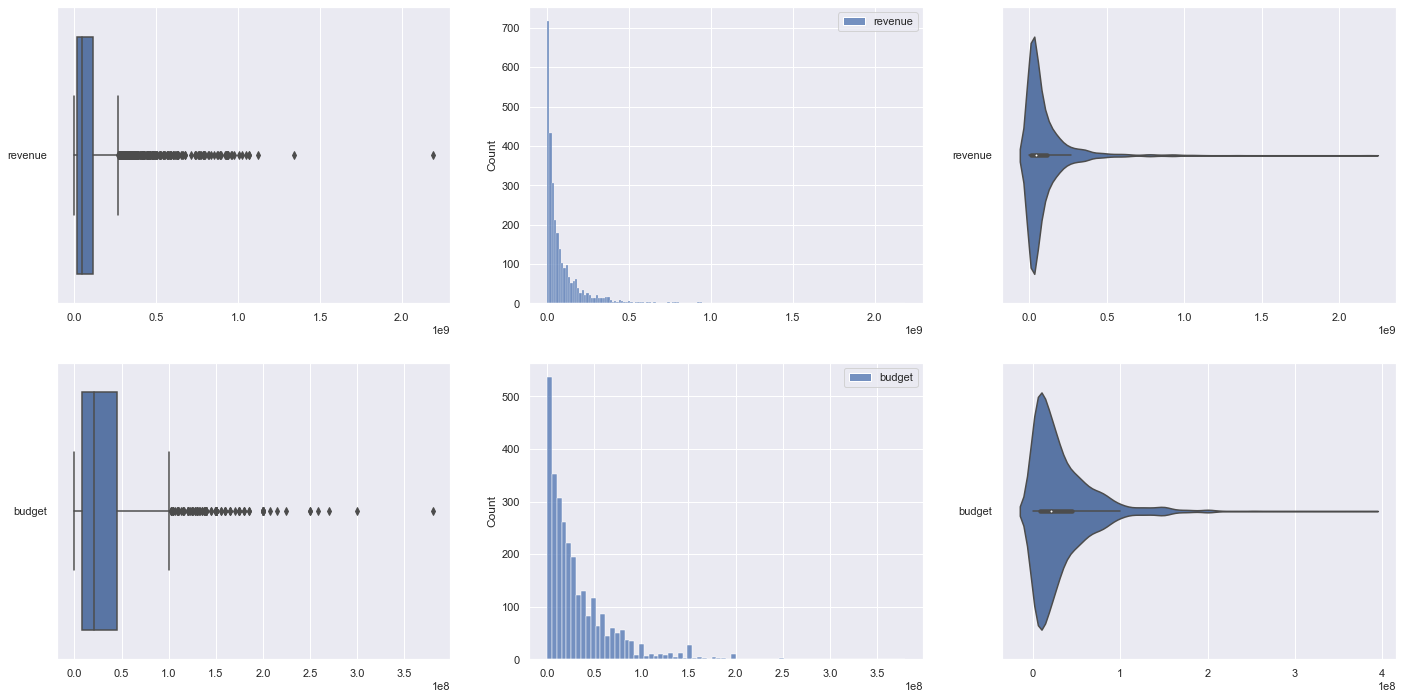

In [9]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for grLivArea
sb.boxplot(data = revenue, orient = "h", ax = axes[0,0])
sb.histplot(data = revenue, ax = axes[0,1])
sb.violinplot(data = revenue, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for salePrice
sb.boxplot(data = budget, orient = "h", ax = axes[1,0])
sb.histplot(data = budget, ax = axes[1,1])
sb.violinplot(data = budget, orient = "h", ax = axes[1,2])

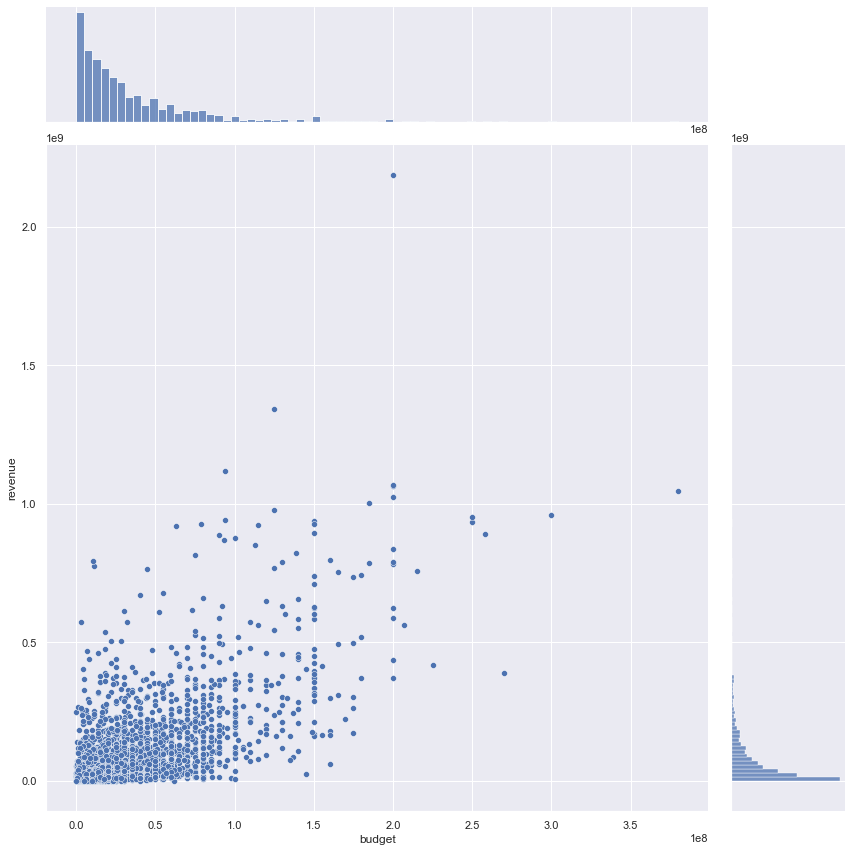

In [10]:

# Jointplot
sb.jointplot(data = df, x = df['budget'], y = df['revenue'], height = 12)

<AxesSubplot:>

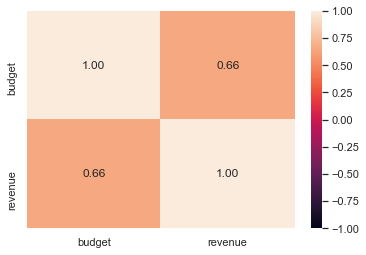

In [11]:
# Create a joint dataframe by concatenating the two variables
trainDF = pd.concat([budget, revenue], axis = 1).reindex(budget.index)

# Calculate the correlation between the two columns/variables
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [12]:
popularity = pd.DataFrame(df['popularity']) # Predictor

<AxesSubplot:>

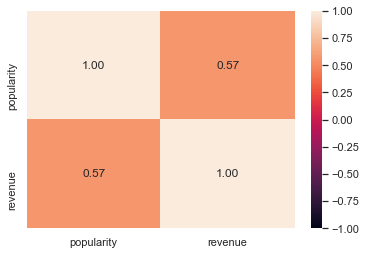

In [13]:
# Create a joint dataframe by concatenating the two variables
trainDF = pd.concat([popularity, revenue], axis = 1).reindex(popularity.index)

# Calculate the correlation between the two columns/variables
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

## Linear regression

In [14]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(df['budget'])
X = pd.DataFrame(df['revenue'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 200)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (2732, 1) (2732, 1)
Test Set  : (200, 1) (200, 1)


In [15]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(X_train, y_train)

LinearRegression()

Intercept 	: b =  [17683088.24940795]
Coefficients 	: a =  [[0.1600692]]


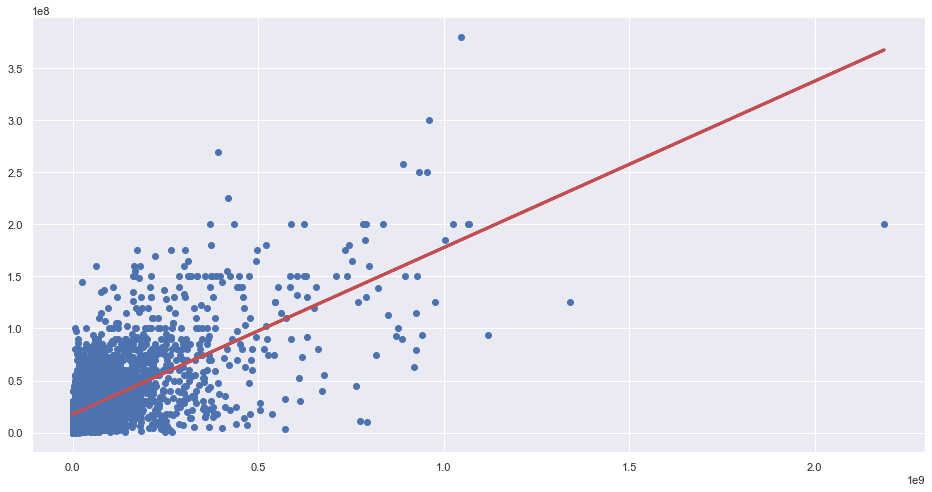

In [16]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [17]:
# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

Explained Variance (R^2) 	: 0.43352650618075506
Mean Squared Error (MSE) 	: 767906613368303.0


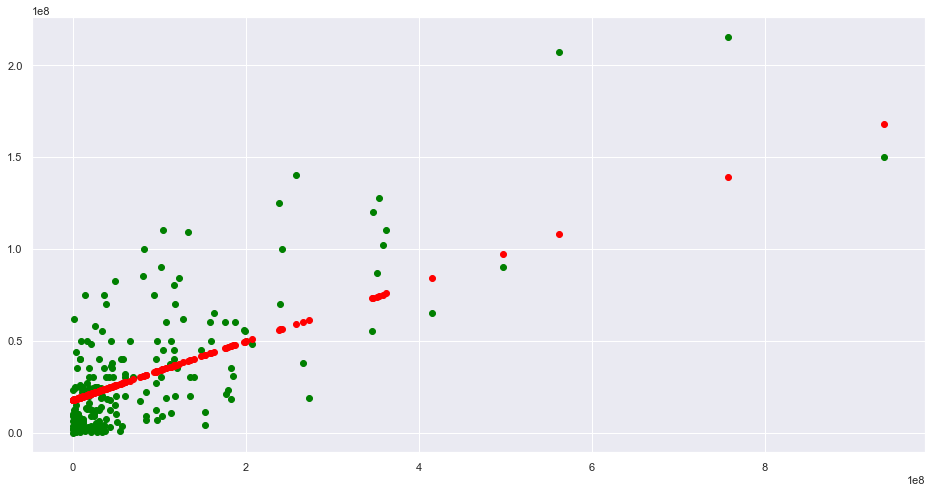

In [18]:
# Predict SalePrice values corresponding to Predictor
y_test_pred = linreg.predict(X_test)

# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

In [19]:
# Compute MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

Mean Squared Error (MSE) 	: 606770298911340.9
